<a href="https://colab.research.google.com/github/thedeenun/weather-prediction/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ลักษณะของกลุ่มข้อมูล (Data Description)
หัวข้อ Weather History Data จาก https://www.visualcrossing.com ซึ่งเป็นข้อมูลที่มีเนื้อหาเกี่ยวกับข้อมูลสภาพอากาศของกรุงเทพมหานครในช่วงเวลาตั้งแต่ 01/01/2015 ถึง 08/31/2021 

โดย Data set ที่เลือกมา มีลักษณะดังนี้

* Data set characteristic : Multivariate
* Attribute characteristic : Real, Nominal, Data-time
* ไม่มี missing values
* จำนวน Instance: 243
* จำนวน Attribute: 17 ดังนี้
  1. Name : ชื่อสถานที่
  2. Date time : วันที่
  3. Maximum Temperature : อุณหภูมิสูงสุด
  4. Minimum Temperature : อุณหภูมิต่ำสุด
  5. Temperature : อุณหภูมิ
  6. Wind Chill : ลมหนาว
  7. Heat Index	: ดัชนีความร้อน
  8. Precipitation : ปริมาณน้ำฝน
  9. Snow : ปริมาณหิมะ
  10. Snow Depth : ความลึกของหิมะ
  11. Wind Speed : ความเร็วลม
  12. Wind Direction : ทิศทางลม
  13. Wind Gust	: ลมกระโชก
  14. Visibility : ทัศนวิสัย
  15. Cloud Cover : เมฆปกคลุม
  16. Relative Humidity	: ความชื้นสัมพัทธ์
  17. Conditions : สภาพอากาศ

###Data preparation/pre-processing

In [83]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/WeatherHistory.csv')
df.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,Bangkok,1/1/2015,28.6,20.2,24.1,NaN,28.6,0.0,NaN,NaN,15.1,69.63,NaN,9.4,14.3,56.53,Clear
1,Bangkok,1/2/2015,28.4,19.2,23.7,NaN,28.1,0.0,NaN,NaN,14.6,109.13,NaN,9.8,16.8,53.89,Clear
2,Bangkok,1/3/2015,30.5,19.0,24.7,NaN,30.9,0.0,NaN,NaN,12.6,180.88,NaN,9.0,28.4,58.74,Partially cloudy
3,Bangkok,1/4/2015,32.0,20.2,26.1,NaN,33.5,0.0,NaN,NaN,13.2,209.33,NaN,8.3,18.5,58.66,Clear
4,Bangkok,1/5/2015,32.2,21.8,27.0,NaN,34.1,0.0,NaN,NaN,10.4,137.88,NaN,7.6,30.6,63.89,Partially cloudy


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 2243 non-null   object 
 1   Date time            2243 non-null   object 
 2   Maximum Temperature  2243 non-null   float64
 3   Minimum Temperature  2243 non-null   float64
 4   Temperature          2243 non-null   float64
 5   Wind Chill           0 non-null      float64
 6   Heat Index           2227 non-null   float64
 7   Precipitation        2243 non-null   float64
 8   Snow                 0 non-null      float64
 9   Snow Depth           0 non-null      float64
 10  Wind Speed           2243 non-null   float64
 11  Wind Direction       2243 non-null   float64
 12  Wind Gust            678 non-null    float64
 13  Visibility           2243 non-null   float64
 14  Cloud Cover          2243 non-null   float64
 15  Relative Humidity    2243 non-null   f

In [86]:
df.describe()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
count,2243.000000,2243.000000,2243.000000,0.0,2227.000000,2243.000000,0.0,0.0,2243.000000,2243.000000,678.000000,2243.000000,2243.000000,2243.000000
mean,33.384842,25.791039,29.207445,NaN,39.397036,8.864837,NaN,NaN,19.540481,176.800673,39.992920,9.380205,46.775568,72.071779
std,2.073107,2.048557,1.794437,NaN,3.775831,18.698533,NaN,NaN,4.975162,50.045795,9.695304,0.671857,17.179050,8.295343
min,20.300000,15.400000,17.600000,NaN,27.100000,0.000000,NaN,NaN,9.000000,16.830000,22.300000,5.100000,4.700000,41.670000
25%,32.400000,25.000000,28.400000,NaN,37.300000,0.000000,NaN,NaN,16.200000,149.275000,33.500000,9.100000,35.700000,67.270000
50%,33.500000,26.000000,29.300000,NaN,39.800000,0.200000,NaN,NaN,18.900000,181.460000,38.900000,9.500000,45.400000,72.420000
75%,34.700000,27.000000,30.300000,NaN,41.700000,9.570000,NaN,NaN,22.300000,211.250000,44.600000,9.900000,55.000000,77.570000
max,39.300000,30.800000,33.500000,NaN,51.400000,228.810000,NaN,NaN,45.200000,319.540000,90.700000,11.100000,94.600000,95.290000


In [87]:
df.isnull().sum()

Name                      0
Date time                 0
Maximum Temperature       0
Minimum Temperature       0
Temperature               0
Wind Chill             2243
Heat Index               16
Precipitation             0
Snow                   2243
Snow Depth             2243
Wind Speed                0
Wind Direction            0
Wind Gust              1565
Visibility                0
Cloud Cover               0
Relative Humidity         0
Conditions                0
dtype: int64

In [88]:
df.drop('Wind Chill', axis=1, inplace=True) #Drop columns ที่มี missing value 
df.drop('Snow', axis=1, inplace=True)
df.drop('Snow Depth', axis=1, inplace=True)
df.drop('Wind Gust', axis=1, inplace=True)

In [89]:
df[df.isna().any(axis=1)] #ตรวจสอบว่ามี attribute ไหนบ้างที่เป็นค่า NaN

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
11,Bangkok,1/12/2015,26.2,21.0,23.3,NaN,0.00,23.3,199.75,9.3,72.1,64.31,Partially cloudy
293,Bangkok,01/25/2016,20.3,15.4,17.6,NaN,0.00,27.9,171.71,9.2,53.4,64.95,Partially cloudy
294,Bangkok,01/26/2016,24.9,16.0,19.3,NaN,0.00,26.3,265.25,9.3,27.9,58.63,Partially cloudy
295,Bangkok,01/27/2016,26.4,16.2,20.8,NaN,0.00,19.6,229.13,9.1,18.1,67.98,Clear
306,Bangkok,2/7/2016,26.6,18.0,22.2,NaN,0.00,26.2,66.54,9.5,23.5,43.82,Clear
307,Bangkok,2/8/2016,26.2,16.2,21.1,NaN,0.00,17.8,90.33,9.2,24.0,44.63,Clear
891,Bangkok,12/19/2017,25.1,16.2,20.9,NaN,0.00,26.4,40.54,9.5,11.7,48.31,Clear
892,Bangkok,12/20/2017,25.0,15.4,20.5,NaN,0.00,25.5,34.75,9.4,10.5,45.60,Clear
893,Bangkok,12/21/2017,26.3,17.0,21.6,NaN,0.00,24.2,159.46,9.5,10.7,46.21,Clear
898,Bangkok,12/26/2017,25.1,20.0,22.9,NaN,3.92,18.4,138.13,7.3,55.8,71.61,"Rain, Partially cloudy"


In [90]:
round(df['Heat Index'].mean(), 2)

39.4

In [91]:
df = df.fillna(round(df['Heat Index'].mean(), 2)) #แทนที่ NaN ด้วยค่า Mean ของ Heat Index

In [92]:
df.iloc[1925] #เช็คว่า Heat Index ทีเคยทีค่า NaN ถูกแทนที่ด้วยค่า Mean รึยัง

Name                          Bangkok
Date time                  10/18/2020
Maximum Temperature                26
Minimum Temperature                22
Temperature                      23.8
Heat Index                       39.4
Precipitation                   13.28
Wind Speed                       15.4
Wind Direction                 114.17
Visibility                        8.3
Cloud Cover                      94.6
Relative Humidity               92.04
Conditions             Rain, Overcast
Name: 1925, dtype: object

In [93]:
df['Conditions'].value_counts() #count class label  ###very fucking overfit

Rain, Partially cloudy    1008
Partially cloudy           845
Clear                      200
Rain, Overcast             159
Overcast                    30
Rain                         1
Name: Conditions, dtype: int64

###Processing

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
#df['Conditions'] = df.Conditions.map({'Rain, Partially cloudy':0, 'Partially cloudy':1, 'Clear':2, 'Rain, Overcast':3, 'Overcast':4, 'Rain':5})

In [96]:
df = df.rename(columns={"Maximum Temperature": "Maximum_Temperature", "Minimum Temperature": "Minimum_Temperature", "Heat Index": "Heat_Index", "Wind Speed": "Wind_Speed", "Wind Direction": "Wind_Direction", "Cloud Cover": "Cloud_Cover", "Relative Humidity": "Relative_Humidity"})

เปลี่ยน class label จาก oject type to numerical type

In [97]:
df.corr().round(2)

,Maximum_Temperature,Minimum_Temperature,Temperature,Heat_Index,Precipitation,Wind_Speed,Wind_Direction,Visibility,Cloud_Cover,Relative_Humidity
Maximum_Temperature,1.00,0.68,0.90,0.77,-0.14,0.13,0.26,0.26,-0.16,-0.20
Minimum_Temperature,0.68,1.00,0.89,0.75,-0.09,0.25,0.41,0.36,0.23,0.19
Temperature,0.90,0.89,1.00,0.80,-0.14,0.19,0.36,0.36,0.02,-0.06
Heat_Index,0.77,0.75,0.80,1.00,0.08,0.24,0.40,0.29,0.14,0.25
Precipitation,-0.14,-0.09,-0.14,0.08,1.00,0.05,0.05,-0.08,0.33,0.45
Wind_Speed,0.13,0.25,0.19,0.24,0.05,1.00,0.26,0.30,0.25,0.02
Wind_Direction,0.26,0.41,0.36,0.40,0.05,0.26,1.00,0.18,0.31,0.20
Visibility,0.26,0.36,0.36,0.29,-0.08,0.30,0.18,1.00,0.15,-0.14
Cloud_Cover,-0.16,0.23,0.02,0.14,0.33,0.25,0.31,0.15,1.00,0.54
Relative_Humidity,-0.20,0.19,-0.06,0.25,0.45,0.02,0.20,-0.14,0.54,1.00


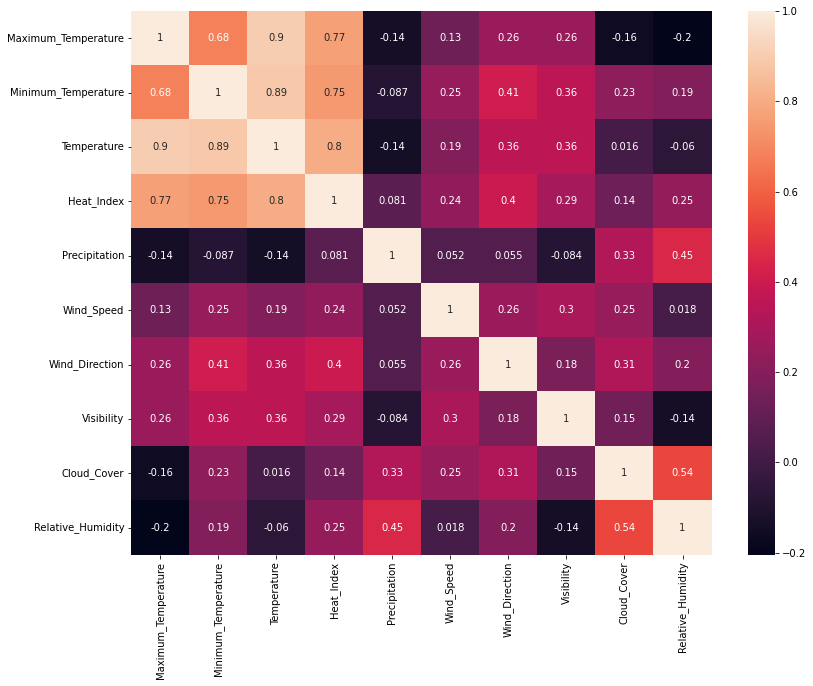

In [98]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

1. Temperature vs Heat Index
2. Heat Index
3. Precipitation
3. Wind Speed
4. Cloud Cover vs Relative Humidity
5. Relative Humidity

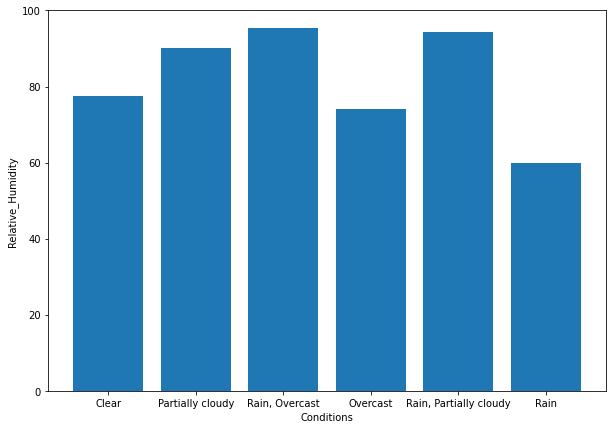

In [99]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['Conditions'], df['Relative_Humidity'])
plt.xlabel('Conditions')
plt.ylabel('Relative_Humidity')
plt.show()

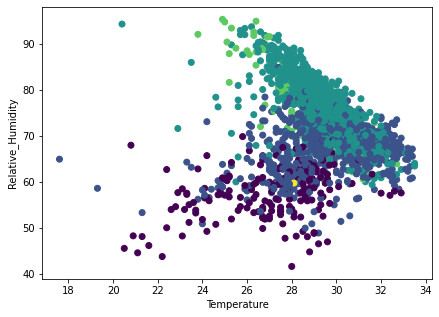

In [100]:
df_cond_num = df.copy()
color = df_cond_num.Conditions.map({'Clear':0, 'Partially cloudy':1, 'Rain, Partially cloudy':2, 'Rain, Overcast':3, 'Rain':4})
fig = plt.figure(figsize =(7, 5))
plt.scatter(df_cond_num['Temperature'], df_cond_num['Relative_Humidity'], c=color)
plt.xlabel('Temperature')
plt.ylabel('Relative_Humidity')
plt.show()

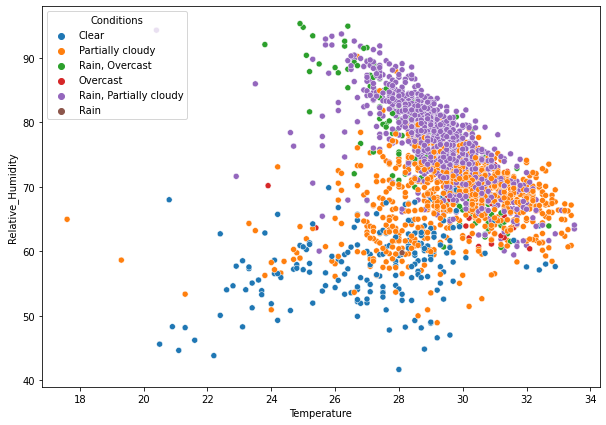

In [101]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="Temperature", y="Relative_Humidity", hue="Conditions")

###Build Model


In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [103]:
X = df.iloc[:,4:12].values
y = df.iloc[:, 12].values

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [105]:
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('NeuralNet', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=10)))

results = []
names = []
for name, model in models:
	cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.821019 (0.022510)
SVM: 0.810191 (0.027588)
NeuralNet: 0.957325 (0.022257)


เลือก Neural Network model ที่มีค่า accuracy มากที่สุดไปใช้งาน

In [109]:
model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) #นำโมเดลที่ train มาแล้ว มา predict ข้อมูลใน x_test
y_pred_proba = model.predict_proba(X_test)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confustion Matrix: \n",confusion_matrix(y_test,y_pred)) # ตรวจสอบความถูกต้อง validate
print()
print("Report: \n",classification_report(y_test,y_pred)) # ตรวจสอบความถูกต้อง validate
print()
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Confustion Matrix: 
 [[ 61   0   0   0   0]
 [  0   0   0   9   0]
 [  1   0 233   0   9]
 [  0   0   0  48   1]
 [  0   0  40   0 271]]

Report: 
                         precision    recall  f1-score   support

                 Clear       0.98      1.00      0.99        61
              Overcast       0.00      0.00      0.00         9
      Partially cloudy       0.85      0.96      0.90       243
        Rain, Overcast       0.84      0.98      0.91        49
Rain, Partially cloudy       0.96      0.87      0.92       311

              accuracy                           0.91       673
             macro avg       0.73      0.76      0.74       673
          weighted avg       0.90      0.91      0.91       673


Accuracy:  0.9108469539375929


###Test with data

In [111]:
print("Test new example")
z_test = [[24.1,	28.6,	0.00,	15.1,	69.63,	9.4,	14.3,	56.53]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

z_test = [[26.3,	34.6,	32.40,	16.2,	134.00,	9.1,	76.7,	92.56]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

z_test = [[27.0,	34.1,	0.00,	10.4,	137.88,	7.6, 30.6,	63.89]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)


z_test = [[26.5,	36.7,	39.83,	15.7,	137.25,	9.5,	69.0,	90.27]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

Test new example
['Clear']
['Rain, Overcast']
['Partially cloudy']
['Rain, Partially cloudy']
